[Text(0, 0, 'Hackney'),
 Text(0, 0, 'Waltham Forest'),
 Text(0, 0, 'Southwark'),
 Text(0, 0, 'Lewisham'),
 Text(0, 0, 'Westminster'),
 Text(0, 0, 'Newham'),
 Text(0, 0, 'City of London'),
 Text(0, 0, 'Haringey'),
 Text(0, 0, 'Kensington & Chelsea'),
 Text(0, 0, 'Lambeth')]

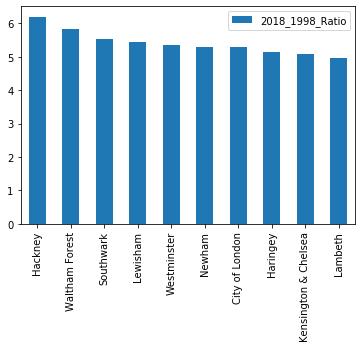

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file.   
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

#transpose properties dataframe
properties_T = properties.transpose()
properties_T = properties_T.reset_index()
properties_T.columns = properties_T.iloc[0]
properties_T = properties_T.drop(0)

#rename dataframe columns 
properties_T.rename(columns={'Unnamed: 0':'London_Boroughs'}, inplace=True)
properties_T = properties_T.rename(columns={np.nan: 'ID'})
properties_T.columns = properties_T.columns.fillna('ID')

#condense property dataframe 
properties_cond = pd.melt(properties_T, id_vars= ['London_Boroughs', 'ID'])
properties_cond = properties_cond.rename(columns={0: 'Date','value': 'Average Price'})

#check dtypes then convert average price column to float64
properties_cond['Average Price'] = pd.to_numeric(properties_cond['Average Price'])

#properties_cond.count() the count of London Boroughs does not match the count of ID or Average Price
properties_cond['London_Boroughs'].unique()
# Clean up the values in London Boroughs
properties_clean = properties_cond.dropna()
#identify non boroughs
Invalid = ['Inner London', 'Outer London', 
            'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
            'EAST MIDLANDS', 'WEST MIDLANDS',
            'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
            'SOUTH WEST', 'England']
properties_clean = properties_clean[~properties_clean.London_Boroughs.isin(Invalid)]

#groupby year
properties_clean['Year'] = properties_clean['Date'].apply(lambda t: t.year)
df = properties_clean.groupby(by=['London_Boroughs', 'Year']).mean()
df = df.reset_index()

#price ratio calculator

def price_ratio(d):
    y1998 = float(d['Average Price'][d['Year']==1998])
    y2018 = float(d['Average Price'][d['Year']==2018])
    ratio = [y2018/y1998]
    return ratio
ratio_list = {}
for i in df['London_Boroughs'].unique():
    borough = df[df['London_Boroughs'] == i]
    ratio_list[i] = price_ratio(borough)
#convert to dataframe
ratio_df = pd.DataFrame(ratio_list)
ratio_dfT = ratio_df.T
ratio_dfT = ratio_dfT.reset_index()
ratio_dfT.rename(columns={'index':'Borough', 0:'2018_1998_Ratio'}, inplace=True)
#sort to determine highest ratios
top10 = ratio_dfT.sort_values(by='2018_1998_Ratio',ascending=False).head(10)
# print(top10) reveals that Hackney and Walthan Forest have the greatest price increases
graph = top10[['Borough','2018_1998_Ratio']].plot(kind='bar')
graph.set_xticklabels(top10.Borough)
